In [1]:
pip install numpy pandas scipy matplotlib seaborn jupyter

# GATHERING DATA

Pada tahap ini, kita akan mengumpulkan semua data yang dibutuhkan. Beruntungnya data yang kita butuhkan telah tersedia dalam repository dataset Dicoding yang dapat diakses melalui tautan berikut: Dicoding Collection. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Memuat tabel customer

Data pertama yang harus kita muat ialah data dari tabel customers. Berikut merupakan kode untuk memuat tabel tersebut menjadi sebuah DataFrame.

In [3]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/customers.csv")
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


## Memuat tabel orders 

Data selanjutnya yang harus kita muat ialah data dari tabel orders. Hal ini dapat dilakukan dengan menjalankan kode berikut.

In [4]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/orders.csv")
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


## Membuat tabel product

Tabel berikutnya yang harus kita muat ialah tabel product. Berikut merupakan kode yang dapat digunakan untuk membuat tabel product menjadi sebuah DataFrame bernama product_df.

In [5]:
product_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/products.csv")
product_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


## Memuat tabel sales

Last but not least, tabel terakhir yang harus kita muat ialah tabel sales. Berikut merupakan contoh kode untuk melakukannya.

In [6]:
sales_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/sales.csv")
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


# ASSESSING DATA

Pada proses ini kita akan menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.

## Menilai Data customers.df

Data pertama yang akan kita nilai adalah customers_df. Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam customers_df. Proses ini dapat dilakukan menggunakan method info() seperti contoh kode berikut.

In [7]:
 customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


Jika Anda perhatikan, tidak ada masalah dengan tipe data dari seluruh kolom tersebut. Akan tetapi, terdapat sedikit perbedaan pada jumlah data pada kolom gender. Hal ini menunjukkan adanya missing values pada kolom gender. Nah, untuk memastikan hal ini, jalankan kode berikut.

In [8]:
customers_df.isna().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

Nah, gambar di atas menunjukkan bahwa terdapat 18 missing values pada kolom gender. Hal ini akan kita tangani pada tahap data cleaning nanti.

Masalah selanjutnya yang harus kita periksa ialah duplikasi data. Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.

In [9]:
print("Jumlah Duplikasi: ", customers_df.duplicated().sum())

Jumlah Duplikasi:  6


Ketika menjalankan kode di atas, Anda akan menemukan bahwa terdapat 6 data yang terduplikat. Pada tahap data cleaning nanti, kita akan menghilangkan semua duplikasi tersebut.

Sekarang kita memeriksa parameter statistik dari kolom numerik yang terdapat dalam customers_df. Untuk mempermudah pemeriksaan, kita akan menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame. Berikut merupakan contoh penggunaannya.

In [10]:
customers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


Jika diperhatikan, terdapat keanehan pada nilai maksimum yang terdapat pada kolom age. Ini kemungkinan besar terjadi karena adanya inaccurate value pada kolom tersebut. Masalah ini juga akan kita bersihkan dalam tahap cleaning data

## Menilai Data orders_df

Oke, selanjutnya kita akan menilai data pada orders_df. Seperti biasa, kita akan mulai dengan memeriksa tipe data dari tiap kolom menggunakan method info().

In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


Jika Anda perhatikan, jumlah data pada orders_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom order_date & delivery_date. Kedua kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

Berikutnya, kita perlu memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada orders_df. Proses ini dilakukan dengan menjalankan kode berikut.

In [12]:
print("Jumlah Duplikat: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah Duplikat:  0


,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada orders_df. 

## Menilai data product_df

Selanjutnya, kita akan menilai data pada product_df. Pertama, gunakan method info() untuk memastikan tipe data tiap kolom dalam product_df telah sesuai.

In [13]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.2+ KB


Berdasarkan hasil tersebut, dapat disimpulkan bahwa tidak terdapat masalah pada tipe data tiap kolom dalam product_df.  Selain itu, jumlah datanya juga telah lengkap sehingga tidak ada missing value di dalamnya.

Hal berikutnya yang harus diperiksa ialah duplikasi dan ringkasan parameter statistik dari product_df. Berikut merupakan kode untuk melakukannya.

In [14]:
print("Jumlah Duplikat: ", product_df.duplicated().sum())

product_df.describe()

Jumlah Duplikat:  6


,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


Berdasarkan gambar di atas, dapat dilihat bahwa terdapat 6 data yang terduplikasi pada product_df. Pada tahap cleaning data, kita akan menghapus duplikasi tersebut.

## Menilai data sales_df

Data terakhir yang harus kita nilai ialah sales_df. Sebagai permulaan, gunakan method info() untuk memeriksa tipe data dan jumlah data yang ada di dalam sales_df.

In [15]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


Berdasarkan hasil di atas, tidak ada masalah pada tipe data tiap kolom dalam sales_df. Namun, terdapat keanehan pada jumlah data pada kolom total_price. Hal ini menunjukkan adanya missing value pada kolom tersebut. Untuk memastikannya, kita bisa menjalankan kode berikut.

In [16]:
sales_df.isna().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

Berdasarkan hasil di atas, dapat disimpulkan bahwa terdapat 19 missing value pada kolom total_price. Hal ini akan kita bersihkan pada tahap cleaning data.

Tahap selanjutnya ialah memeriksa duplikasi dan ringkasan parameter statistik dari sales_df. Berikut merupakan contoh kode untuk melakukannya.

In [17]:
print("Jumlah Duplikasi: ", sales_df.duplicated().sum())

sales_df.describe()

Jumlah Duplikasi:  0


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


Hasil di atas menunjukkan bahwa tidak ada duplikasi pada slaes_df. Selain itu, ia juga menunjukkan tidak terdapat keanehan dalam ringkasan parameter statistik dari sales_df.

Oke, sampai tahap ini, kita telah berhasil mengidentifikasi berbagai masalah pada data yang telah kita kumpulkan. Berikut merupakan rangkumannya.

# CLEANING DATA

Pada tahap ini, kita akan membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.

## Menghilangkan duplicated data

Masalah pertama yang akan kita tangani ialah duplicate data. Seperti yang telah kita pelajari sebelumnya, ketika menemukan duplikasi pada data, kita harus menghilangkan atau menghapus duplikasi tersebut. Nah, untuk melakukan hal ini, kita dapat memanfaatkan method drop_duplicates(). Berikut merupakan kode untuk menghapus duplikasi pada customer_df.

In [18]:
customers_df.drop_duplicates(inplace=True)

In [19]:
print("Jumlah Duplikasi: ", customers_df.duplicated().sum())

Jumlah Duplikasi:  0


Jika proses penghapusan duplikasi berjalan lancar, kode di atas akan menghasilkan keluaran yang menunjukkan tidak adanya duplikasi pada customers_df.

## Menangani missing value

Masalah berikutnya yang harus kita tangani ialah missing value pada kolom gender. Nah, secara umum terdapat tiga metode untuk mengatasi missing value yaitu dropping, imputation, dan interpolation. Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut.

In [20]:
customers_df[customers_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


Kode di atas hanya akan menampilkan baris data yang memenuhi kondisi customers_df.gender.isna() atau dengan kata lain ia akan menampilkan baris data yang mengandung missing value pada kolom gender. Berikut merupakan tampilan baris data tersebut.

Berdasarkan gambar di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.

Pada metode imputation, kita akan menggunakan nilai tertentu untuk mengganti missing value. Musabab kolom gender merupakan kolom kategorik, kita akan menggunakan nilai yang dominan sebagai pengganti missing value tersebut. Gunakanlah method value_counts()untuk mengidentifikasi nilai yang dominan.

In [21]:
customers_df.gender.value_counts()

Prefer not to say    725
Male                 143
Female               115
Name: gender, dtype: int64

Berdasarkan hasil di atas, dapat diketahui bahwa nilai yang paling dominan dalam kolom gender ialah “Prefer not to say”. Nilai inilah yang selanjutnya akan kita gunakan sebagai pengganti missing value. Proses penggantian ini dapat dilakukan menggunakan method fillna()seperti contoh berikut.

In [22]:
customers_df.fillna(value="Prefer not to say", inplace=True)

Untuk memastikan proses di atas berjalan dengan semestinya, kita bisa menjalankan kembali kode untuk mengidentifikasi missing value seperti berikut.

In [23]:
customers_df.isna().sum()

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

Jika proses pembersihan missing value tersebut berhasil, Anda akan memperoleh hasil seperti diatas.

## Menangani inaccurate value

Oke, sekarang kita akan mengatasi masalah inaccurate value pada kolom age. Sebagai awal, kita perlu melihat data baris data yang mengandung inaccurate value tersebut (baris dengan nilai age maksimum). Hal ini dilakukan menggunakan teknik filter seperti contoh kode berikut.

In [24]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


Kode di atas akan menampilkan baris data yang memiliki nilai age maksimum.

Berdasarkan data tersebut, kita bisa berasumsi bahwa inaccurate value tersebut terjadi karena human error sehingga kelebihan memasukkan nilai nol. Oleh karena itu, gantilah dengan nilai 70. Proses ini dilakukan dengan memanfaatkan method replace()seperti contoh berikut.

In [25]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


Penyebab kesalahan ini kemungkinan sama dengan sebelumnya, yaitu human error yang kelebihan memasukkan nilai nol. Untuk menangani hal ini, kita akan menggantinya dengan nilai 50.

In [26]:
customers_df.age.replace(customers_df.age.max(), 50, inplace=True)

In [27]:
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,50.303696,5000.693307
std,289.013599,22.657398,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,500.000000,9998.000000


Berdasarkan hasil tersebut dapat dilihat bahwa kolom age memiliki nilai maksimum yang cukup masuk akal. Selain itu, jika Ada perhatikan, nilai mean dan standard deviation ikut berubah setelah kita menangani inaccurate value tersebut.

## Membersihkan Data orders_df 

Oke, sekarang kita telah menyelesaikan semua permasalahan yang ada pada customers_df. Selanjutnya, kita akan mengatasi permasalahan pada orders_df. Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom order_date & delivery_date.

Untuk mengatasi masalah ini, kita akan mengganti tipe data pada kolom order_date & delivery_date menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas. Berikut merupakan contoh kode untuk melakukannya.

In [28]:
datetime_columns = ["order_date", "delivery_date"]\

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

Kode di atas akan mengubah tipe data pada kolom order_date & delivery_date menjadi datetime. Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut menggunakan method info().

In [29]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


## Membersihkan Data product_df

Data berikutnya yang akan kita bersihkan ialah product_df. Sesuai hasil assessing data sebelumnya, kita mengetahui bahwa terdapat 6 data yang terduplikasi pada product_df. Untuk mengatasi hal ini, kita perlu membuang data yang sama tersebut menggunakan method drop_duplicates() seperti contoh berikut

In [30]:
product_df.drop_duplicates(inplace=True)

Kode di atas akan menghapus semua data yang duplikat. Untuk memastikan kode tersebut berjalan sesuai harapan, jalankanlah kode berikut.

In [31]:
print("Jumlah Duplikasi: ", product_df.duplicated().sum())

Jumlah Duplikasi:  0


Jika proses penghapusan data yang duplikat berjalan dengan lancar, kode di atas akan menghasilkan keluaran seperti berikut “Jumlah duplikasi:  0”.

## Membersihkan Data sales_df

Data selanjutnya yang perlu Anda bersihkan ialah sales_df. Berdasarkan hasil penilain data sebelumnya, diketahui bahwa terdapat 19 missing value pada kolom total_price. Untuk mengetahui proses penanganan missing value yang paling sesuai, kita perlu melihat terlebih dahulu baris data yang mengandung missing value tersebut. 

In [32]:
sales_df[sales_df.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


Kode di atas akan menampilkan semua baris data yang memiliki missing value pada kolom total_price seperti pada gambar diatas.

Berdasarkan tampilan data tersebut, kita menemukan bahwa nilai total_price merupakan hasil perkalian antara price_per_unit dan quantity. Kita dapat menggunakan pola ini untuk menangani missing value pada kolom total_price. Berikut merupakan contoh penerapan kode untuk melakukannya.

In [33]:
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]

Kode di atas akan mengatasi seluruh missing value serta memastikan nilai pada kolom total_price telah sesuai. Untuk memastikan hal ini, Anda dapat memeriksa kembali jumlah missing value pada sales_df menggunakan kode berikut.

In [34]:
sales_df.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

# Melakukan Eksplorasi Data

Pada tahap ini, mungkin hasil yang diperoleh belum cukup untuk menjawab tersebut secara menyeluruh. Namun, proses ini akan sangat membantu kita untuk mengenal data yang sedang ditangani dan membuat strategi analisis yang paling efisien

## Eksplorasi Data customers_df

Pertama, kita akan mengeksplorasi data customers_df terlebih dahulu. Seperti yang kita ketahui, dataset ini memuat berbagai informasi terkait customer, seperti customer_id, customer_name, gender, age, home_address, zip_code, city, state, dan country. 

Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data customers_df menggunakan method describe().

In [35]:
customers_df.describe(include="all")

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,New Ava,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,50.303696,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,22.657398,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah pelanggan sebanyak 1001 orang yang berumur di kisaran antara 20 hingga 80 tahun dengan rata-rata umur sebesar 49.87 tahun dengan standar deviasinya sebesar 17.64 tahun. Informasi ini tentunya dapat memberikan gambaran bahwa segmentasi pelanggan yang kita miliki cukup luas mulai dari remaja hingga lanjut usia.  

Sekarang coba kita lihat demografi pelanggan berdasarkan jenis kelamin (gender). Untuk melakukan ini, kita akan menggunakan method groupby() yang diikuti dengan method agg(). Berikut contoh kode untuk melakukannya.

In [36]:
customers_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["max", "min", "mean", "std"]
})

customer_id  age                          
                      nunique  max min       mean        std
gender                                                      
Female                    115   79  20  49.147826  16.646607
Male                      143   80  20  51.230769  18.462635
Prefer not to say         742  500  20  50.304172  24.159378

Kode di atas akan menghasilkan sebuah pivot table. Ia memuat informasi jumlah pelanggan (nunique dari customer_id) serta parameter umur yang dikelompokkan berdasarkan jenis kelamin.

Berdasarkan pivot table di atas, dapat diketahui bahwa pelanggan yang kita miliki didominasi oleh jenis kelamin prefer not to say. Di lain sisi, distribusi umur mereka ternyata cukup mirip yaitu berkisar antara 20 hingga 80 tahun.

Selanjutnya, kita coba melihat persebaran jumlah pelanggan berdasarkan kota (city) dan negara bagian (state). Untuk melakukannya kita juga akan menggunakan method groupby(). Selain itu, agar hasilnya lebih mudah untuk dilihat, kita akan mengurutkan nilainya menggunakan method sort_values() secara descending. Berikut contoh kode untuk melakukannya.

In [37]:
customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)
customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan kita cukup merata pada setiap kota dan negara bagian. Pelanggan kita paling banyak berada di kota East Aidan, East Sophia, dan New Ava dengan jumlah masing-masing tiga pelanggan. Selain itu, pelanggan kita paling banyak berasal dari negara bagian South Australia.

## Eksplorasi Data orders_df

Data kedua yang akan kita eksplor adalah orders_df. Ia mengandung berbagai informasi terkait sebuah order yang terdiri dari order_id, customer_id, order_date, dan delivery_date. Berdasarkan informasi tersebut, kita bisa membuat sebuah kolom baru untuk memuat waktu pengiriman tiap order. Untuk melakukannya, kita perlu menghitung selisih antar delivery_date dan order_date serta menyimpannya sebagai delivery_time. Selanjutnya, kita akan menggunakan method apply() untuk melakukan sebuah operasi terhadap setiap elemen dalam sebuah kolom DataFrame atau Series (bentuk satu dimensi dari DataFrame). 

Operasi yang akan kita lakukan ialah menghitung jumlah detik dari delivery_time menggunakan method total_seconds(). Nilai tersebut selanjutnya diubah ke dalam satuan hari (dibagi 86400) dan diambil bilangan bulatnya saja. Berikut merupakan contoh kode untuk melakukan semua proses tersebut.

In [38]:
delivery_time = orders_df["delivery_date"] - orders_df["order_date"]

delivery_time = delivery_time.apply(lambda x: x.total_seconds())

orders_df["delivery_time"] = round(delivery_time/86400)

Untuk memperoleh rangkuman parameter statistik dari data orders_df, kita bisa menggunakan method describe() seperti contoh kode berikut.

In [39]:
orders_df.describe(include="all")

C:\Users\yoanr\AppData\Local\Temp\ipykernel_1128\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
C:\Users\yoanr\AppData\Local\Temp\ipykernel_1128\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")


,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
unique,NaN,NaN,NaN,291,305,NaN
top,NaN,NaN,NaN,2021-06-20 00:00:00,2021-08-09 00:00:00,NaN
freq,NaN,NaN,NaN,10,9,NaN
first,NaN,NaN,NaN,2021-01-01 00:00:00,2021-01-03 00:00:00,NaN
last,NaN,NaN,NaN,2021-10-24 00:00:00,2021-11-20 00:00:00,NaN
mean,500.500000,506.640000,33972.936000,NaN,NaN,14.078000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225
min,1.000000,1.000000,10043.000000,NaN,NaN,1.000000
25%,250.750000,275.250000,21329.250000,NaN,NaN,8.000000


Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 14 hari dengan nilai maksimum sebesar 27 hari dan nilai minimum sebesar 1 hari. 

Oke, sekarang kita telah memiliki cukup informasi terkait data orders_df, selanjutnya kita akan coba mencari informasi lain dengan menghubungkan data tersebut dengan data customers_df.

## Eksplorasi Data orders_df dan customers_df 

Jika Anda perhatikan, pada data orders_df terdapat kolom yang berisi informasi terkait customer id pelanggan yang pernah melakukan order. Informasi ini bisa kita gunakan untuk mengidentifikasi pelanggan yang belum pernah melakukan order. Untuk melakukan hal ini, kita bisa membuat sebuah kolom baru bernama “status” pada data customers_df. Kolom tersebut memiliki nilai “Active” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali. Berikut merupakan kode untuk melakukannya. 

In [40]:
customers_id_in_orders_df = orders_df.customer_id

customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customers_id_in_orders_df else "Non Active")

customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
107,108,fulan 108,Prefer not to say,57,7285 Mason BoulevardSuite 754,1392,Port Rosemouth,Queensland,Australia,Active
166,167,fulan 167,Prefer not to say,34,1952 Collins StreetSuite 930,6902,Ellieshire,Australian Capital Territory,Australia,Active
937,932,fulan 932,Male,21,766 Nicholas HillSuite 869,3265,Borerfort,Western Australia,Australia,Active
788,785,fulan 785,Prefer not to say,54,82 Beahan BoulevardSuite 281,2683,Port Adamburgh,Northern Territory,Australia,Active
255,256,fulan 256,Prefer not to say,46,7204 Toby SummitApt. 845,9007,North Lillian,Australian Capital Territory,Australia,Active


Untuk memperoleh informasi terkait jumlah pelanggan yang berstatus “Active” dan “Non Active”, kita bisa menggunakan pivot table. Berikut contoh kode untuk membuat pivot table menggunakan kolom “status”.

In [41]:
customers_df.groupby(by="status").customer_id.count()

status
Active        1000
Non Active       1
Name: customer_id, dtype: int64

Seperti yang terlihat pada pivot table di atas, hanya terdapat satu pelanggan yang belum pernah melakukan transaksi sebelumnya. Ini tentunya merupakan kabar gembira bagi kita karena hampir 100% pelanggan kita pernah melakukan order setidaknya satu kali.

Untuk memperoleh lebih banyak informasi terkait kedua data tersebut, kita perlu menggabungkan keduanya melalui proses join atau merge. Berikut merupakan contoh kode untuk melakukan merge terhadap data orders_df dan customers_df.

In [42]:
orders_customers_df = pd.merge(left=orders_df,
                              right=customers_df,
                              how="left",
                              left_on="customer_id",
                              right_on="customer_id")

orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


Pada kode di atas, kita melakukan proses merge dengan metode “left”. Tentunya Anda masih ingat bukan dengan metode tersebut. Yap, betul sekali metode ini memungkinkan kita untuk mengambil semua nilai dari tabel kiri serta nilai yang bersesuaian dengan tabel kanan. Berikut merupakan tampilan data dari kode di atas.

### Jumlah order berdasarkan kota

Kita bisa membuat pivot table untuk memperoleh informasi terkait jumlah order berdasarkan kota dengan kode seperti berikut.

In [43]:
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Lake Rose,5
3,O'keefeton,5
4,East Max,5
5,Port Hannahburgh,5
6,Rubyfort,5
7,West Kai,5
8,Andrewborough,4
9,Port Aaronton,4


Berdasarkan hasil tersebut, diketahui bahwa kota Jordanside dan New Ava merupakan dua kota yang memiliki jumlah order terbanyak.

### Jumlah order berdasarkan state 

Sekarang kita akan melihat jumlah order berdasarkan state. Untuk memperoleh informasi terkait hal ini, kita juga bisa menggunakan pivot table. Gunakan kode di bawah ini untuk menerapkannya.

In [44]:
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False)

state
South Australia                 148
Queensland                      139
Western Australia               130
New South Wales                 129
Australian Capital Territory    118
Victoria                        118
Tasmania                        112
Northern Territory              106
Name: order_id, dtype: int64

Kode tersebut akan menghasilkan pivot table seperti diatas. Berdasarkan pivot table tersebut, diketahui bahwa South Australia merupakan state yang balik banyak melakukan order.

### Jumlah order berdasarkan gender

Informasi selanjutnya yang dapat kita eksplorasi adalah jumlah order berdasarkan gender. Untuk melakukan hal ini, tentunya kita perlu membuat sebuah pivot table menggunakan kode berikut.

In [45]:
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False)

gender
Prefer not to say    725
Female               139
Male                 136
Name: order_id, dtype: int64

Berdasarkan hasil tersebut, dapat dilihat bahwa kebanyakan order dilakukan oleh pelanggan yang berjenis kelamin prefer not to say. Hal ini tentunya sejalan dengan jumlah pelanggan yang kebanyakan dari kelompok gender tersebut.


### Jumlah order berdasarkan kelompok usia 

Last but not least, kita juga bisa mengeksplorasi jumlah order berdasarkan kelompok usia. Untuk melakukan hal ini, kita perlu mendefinisikan sebuah kolom baru bernama “age_group”. Kolom ini akan membantu kita dalam mengelompokkan pelanggan ke dalam tiga kelompok, yaitu youth, adults, dan seniors. Selanjutnya, buatlah pivot table berdasarkan hal tersebut menggunakan contoh kode di bawah ini.

In [46]:
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))
                                                                                                    

orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

age_group
Adults     681
Seniors    226
Youth       93
Name: order_id, dtype: int64

Berdasarkan hasil tersebut diketahui bahwa pelanggan yang paling banyak melakukan order berasal dari kelompok usia Adults.

## Eksplorasi Data product_df dan sales_df

Pada tahap ini, kita akan mengeksplorasi data product_df dan sales_df. Sebagai permulaan, kita dapat melihat rangkuman parameter statistik dari keduanya menggunakan method describe().

In [47]:
product_df.describe(include="all")

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,XS,red,NaN,NaN,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,NaN,420,70,252,180,NaN,NaN,1
mean,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


In [48]:
sales_df.describe(include="all")

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


Berdasarkan hasil tersebut, dapat dilihat bahwa harga barang yang dijual berkisar antara 90 hingga 119 dolar. Selain itu, kita juga memperoleh informasi lain yang tidak kalah menarik yaitu pada setiap transaksi pelanggan paling banyak membeli tiga buah item dalam satu jenis produk dengan total harga sebesar 357 dolar. 

Apabila Anda penasaran dengan produk yang memiliki harga termahal dan terendah, silakan jalankan kode berikut untuk melihatnya. 

Berikut merupakan tampilan hasil dari kode di atas. Dapat dilihat bahwa produk termahal ialah item jaket bernama Parka dan yang termurah bernama Bomber.

In [49]:
product_df.sort_values(by="price", ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
704,698,Jacket,Parka,L,violet,119,53,"A violet coloured, L sized, Parka Jacket"
671,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
698,692,Jacket,Parka,M,indigo,119,66,"A indigo coloured, M sized, Parka Jacket"
699,693,Jacket,Parka,L,indigo,119,44,"A indigo coloured, L sized, Parka Jacket"
700,694,Jacket,Parka,XL,indigo,119,78,"A indigo coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1225,1219,Trousers,Pleated,XL,indigo,90,45,"A indigo coloured, XL sized, Pleated Trousers"
1226,1220,Trousers,Pleated,XS,violet,90,58,"A violet coloured, XS sized, Pleated Trousers"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"
1228,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"


Selanjutnya, kita bisa menggunakan pivot table untuk mencari informasi terkait produk berdasarkan tipe dan nama produknya. Berikut contoh kode yang bisa Anda gunakan.

In [50]:
product_df.groupby(by="product_type").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})



product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

In [51]:
product_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

Pivot table di atas dapat memberikan kita gambaran terkait produk yang dijual oleh Dicoding Collection. Sebagai calon praktisi data yang Andal, tentunya Anda penasaran dengan produk yang paling laris. Nah, untuk menjawab pertanyaan ini, kita perlu menyatukan (merge) tabel product_df dan sales_df dengan kode berikut.

Pada dasarnya kode di atas akan melakukan proses merge terhadap data product_df dan sales_df. Proses merge tersebut dilakukan menggunakan metode “left”. Berikut hasil dari proses merge tersebut.

In [52]:
sales_product_df = pd.merge(left=sales_df,
                           right=product_df,
                           how="left",
                           left_on="product_id",
                           right_on="product_id")

sales_product_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


Jika diperhatikan kembali, hasil dari proses merge di atas memiliki perbedaan antara nilai price_per_unit dan price. Hal ini bisa terjadi karena adanya potongan harga, biaya operasional, dan biaya lainnya. 

Kita akan membuat pivot table berdasarkan produk type dengan kode berikut.

In [53]:
sales_product_df.groupby(by="product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


Jika Anda perhatikan pivot table di atas, Trousers merupakan tipe produk yang paling laris. Akan tetapi, jika dilihat berdasarkan revenue yang diterima, Jacket merupakan tipe produk yang paling banyak menyumbang revenue perusahaan. 

Kita bisa membuat pivot table yang sama untuk melihat informasi penjualan berdasarkan nama produk menggunakan kode di bawah ini

In [54]:
sales_product_df.groupby(by="product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


Berdasarkan pivot table tersebut, diketahui bahwa produk Denim merupakan produk yang paling laris dan juga paling banyak menyumbang revenue terhadap perusahaan.  

### Eksplorasi Data all_df 

Jika diperhatikan data penjualan ini cukup menarik untuk ditelusuri lebih dalam. Hal ini dilakukan guna melihat pola pembelian berdasarkan demografi pelanggan. Oleh karena itu, kita perlu membuat sebuah DataFrame baru bernama all_df untuk menampung semua informasi dari keempat tabel yang kita miliki. Berikut contoh kode yang dapat kita gunakan untuk menjalankan proses penggabungan ini.

In [55]:
all_df = pd.merge(left=sales_product_df,
                 right=orders_customers_df,
                 how="left",
                 left_on="order_id",
                 right_on="order_id")

all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors


Selanjutnya, mari kita coba lihat preferensi pembelian berdasarkan state pelanggan dan tipe produk menggunakan kode di bawah ini.

In [56]:
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

Pivot table di atas memberikan kita gambaran terkait tipe produk yang disukai pengguna berdasarkan lokasi negara bagiannya. Jika diperhatikan, tipe produk Jacket (garis merah) paling banyak terjual pada negara bagian Queensland, South Australia, dan New South Wales. Untuk tipe produk lain, Anda bisa melihatnya pada gambar pivot table di atas. 

Sekarang Anda bisa melakukan hal yang sama untuk mengetahui selera tipe produk pelanggan berdasarkan gender dan kelompok usia. Berikut contoh kode yang bisa Anda gunakan

In [57]:
all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
gender            product_type                         
Female            Jacket               481        50963
                  Shirt                445        45146
                  Trousers             481        49295
Male              Jacket               480        50978
                  Shirt                410        41939
                  Trousers             453        46071
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808

In [58]:
all_df.groupby(by=["age_group", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
age_group product_type                         
Adults    Jacket              2292       245055
          Shirt               2225       227781
          Trousers            2272       231271
Seniors   Jacket               777        82959
          Shirt                733        74977
          Trousers             766        77471
Youth     Jacket               274        29012
          Shirt                301        30842
          Trousers             322        32432

Pivot table di atas dapat memberikan kita gambaran terkait selera tipe produk pelanggan berdasarkan gender dan kelompok usia. Semua informasi ini akan sangat membantu Anda dalam menjawab pertanyaan terkait preferensi pengguna berdasarkan demografinya.

### Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

Seperti biasa, library tercinta kita yaitu pandas telah menyediakan sebuah method bernama resample(). Method ini memungkinkan kita untuk mengubah frekuensi atau melakukan resampling terhadap DataFrame yang memiliki komponen time series. Untuk menggunakan method ini, kita harus mendefinisikan parameter rule (mengatur target konversi) dan on (nama kolom bertipe datetime yang akan diubah frekuensinya). Selengkapnya, Anda dapat membaca dokumentasi berikut: pandas.DataFrame.resample.

Berikut contoh kode untuk mengubah frekuensi data untuk memperoleh informasi terkait jumlah order dan total revenue yang diperoleh setiap bulannya. 

In [59]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y- %m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)

monthly_orders_df.head()

,order_date,order_count,revenue
0,2021- 01,109,119333
1,2021- 02,93,95080
2,2021- 03,117,131364
3,2021- 04,99,97530
4,2021- 05,84,85597


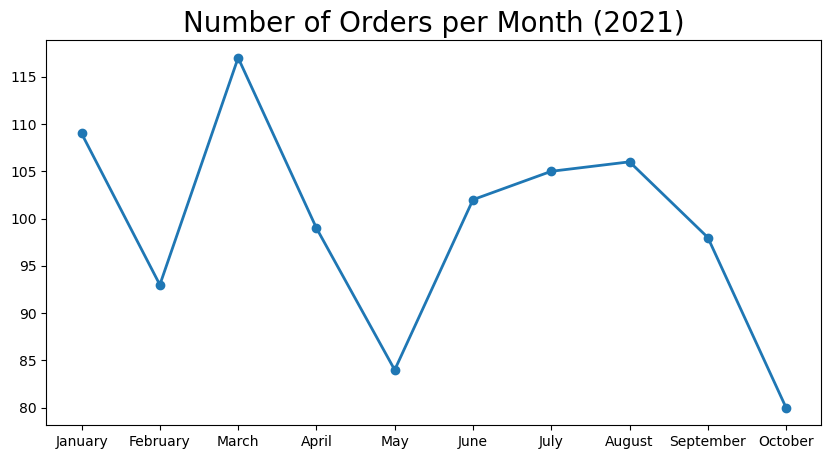

In [60]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
    
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan
     
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
     
plt.figure(figsize=(10, 5)) 
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2) 
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan Maret. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan Februari, April, Mei, dan Oktober. 

Tentunya penurunan tersebut akan berdampak pada total revenue yang diperoleh perusahaan. Untuk memvalidasi hal ini, buatlah line chart menggunakan contoh kode berikut.

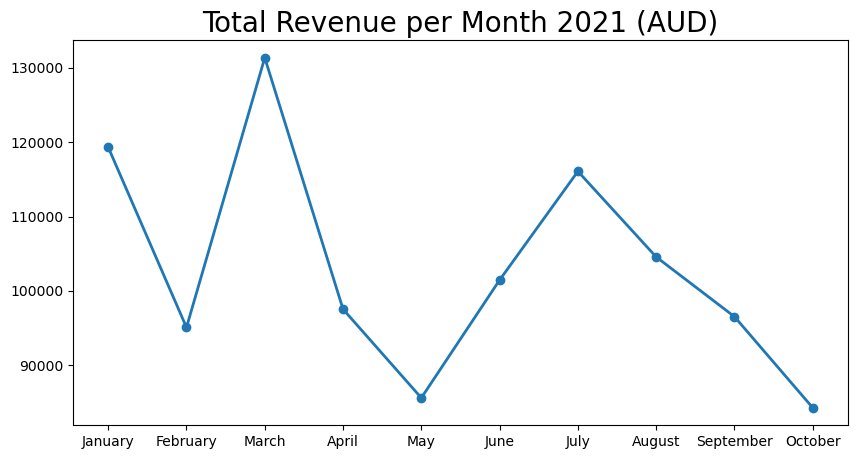

In [61]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["revenue"], marker='o', linewidth=2)
plt.title("Total Revenue per Month 2021 (AUD)", loc='center', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Penurunan jumlah orderan yang sangat signifikan terjadi pada bulan Februari, April, Mei, dan Oktober berdampak terhadap penurunan revenue perusahaan. Normalnya, kita harus mencari tahu penyebab terjadinya penurunan tersebut dengan mempertimbangkan banyak hal, seperti keberadaan kompetitor, campaign, dll. Namun, untuk studi kasus ini, kita tidak memiliki cukup informasi terkait hal tersebut.

### Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

Pada pertanyaan bisnis selanjutnya, kita ingin mengidentifikasi produk dengan penjualan terbanyak dan paling sedikit. Untuk melakukan ini, tentunya kita harus membuat sebuah DataFrame baru guna menampung informasi terkait jumlah penjualan tiap produk. Berikut merupakan contoh kode untuk melakukannya.

In [62]:
sum_orders_items_df = all_df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_orders_items_df.head(15)

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
5,Relaxed Leg,301
6,Trench Coat,299
7,Puffer,298
8,Bomber,297
9,Chambray,290


Untuk mempermudah kita dalam menyampaikan informasi tersebut, kita harus membuat visualisasi data dalam bentuk bar chart. Selain itu, untuk mempermudah orang lain dalam mengidentifikasi produk dengan performa terbaik dan terburuk, kita perlu membuat dua buah visualisasi data dalam satu gambar visual. Untuk melakukan ini, gunakanlah function subplot(). Berikut contoh kode untuk membuatnya.

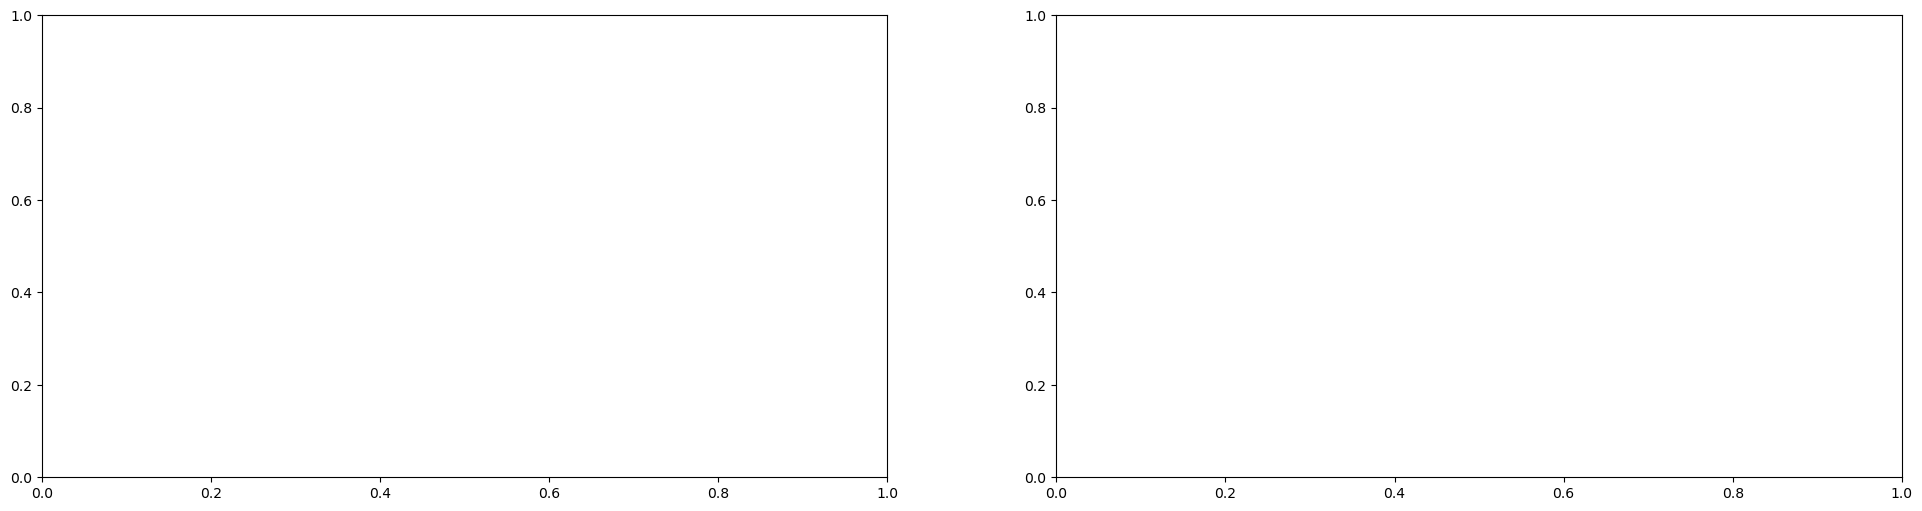

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

Kode diatas akan menghasilkan kanvas kosong dengan object berupa fig dan ax seperti diatas ini.

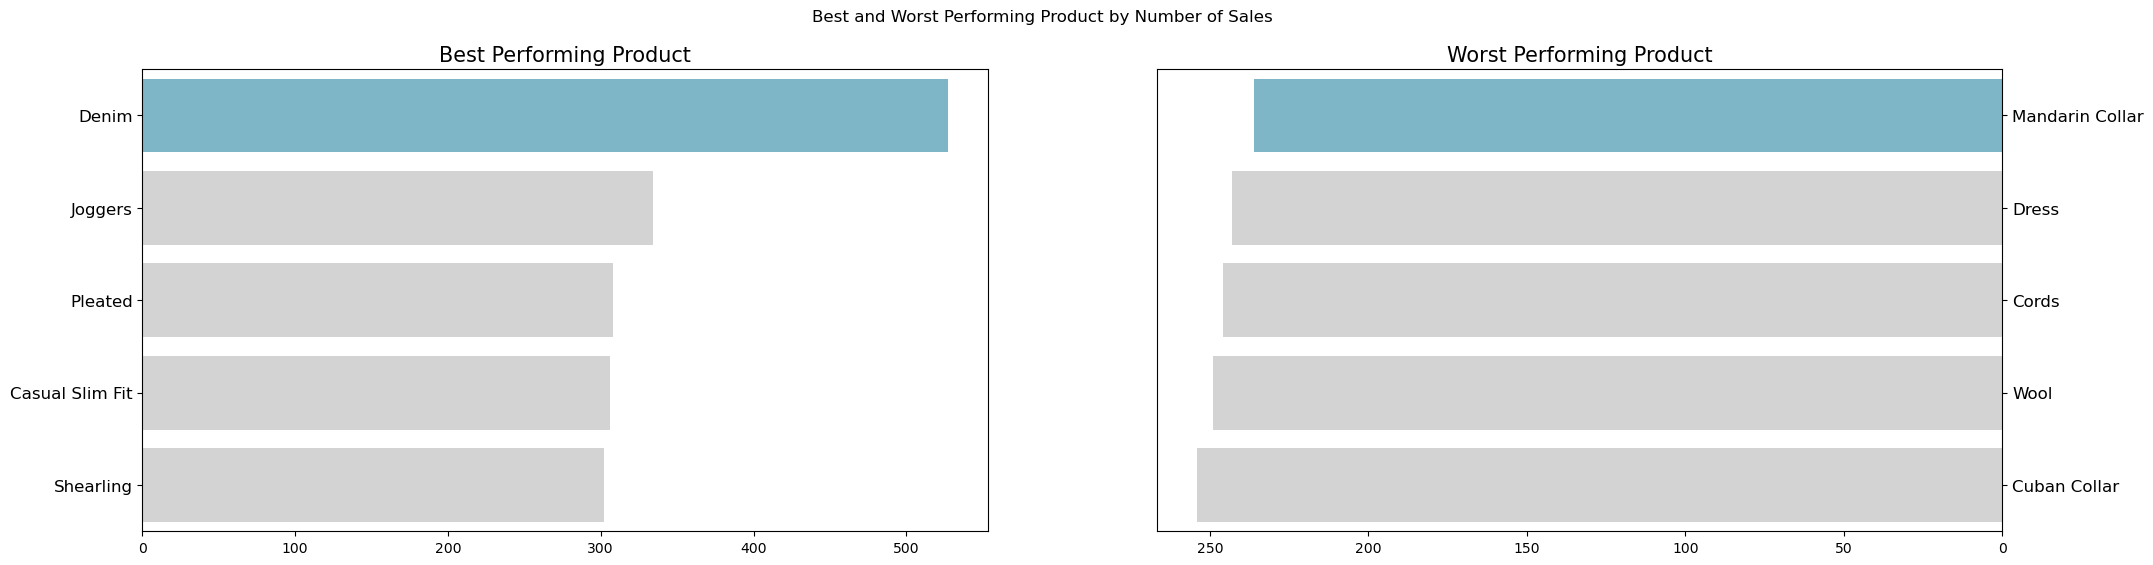

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity_x", y="product_name", data=sum_orders_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="quantity_x", y="product_name", data=sum_orders_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=12)
plt.show()

Pada kode di atas, kita mengisi kanvas sebelumnya dengan bar chart yang dibuat menggunakan library seaborn. ax[0] merupakan object untuk kanvas pertama (bagian kanan) dan ax[1] merupakan object untuk kanvas kedua (bagian kiri). Berikut hasil visualisasi data yang akan Anda peroleh.

Berdasarkan gambar di atas, Anda dapat melihat bahwa produk Denim merupakan produk yang paling laris. Kontras dengan hal tersebut, produk Mandarin Collar merupakan produk yang paling sedikit terjual.  

## Bagaimana Demografi Pelanggan yang kita Miliki?

Pertanyaan selanjutnya yang ingin kita jawab ialah terkait demografi pelanggan yang kita miliki. Untuk menjawab hal ini, tentunya kita bisa membuat DataFrame baru untuk menampung informasi terkait jumlah pelanggan untuk demografi tertentu seperti gender, state, dll.

### Berdasarkan Gender

Untuk mengidentifikasi jumlah pelanggan berdasarkan gender, Anda bisa menggunakan kode berikut.

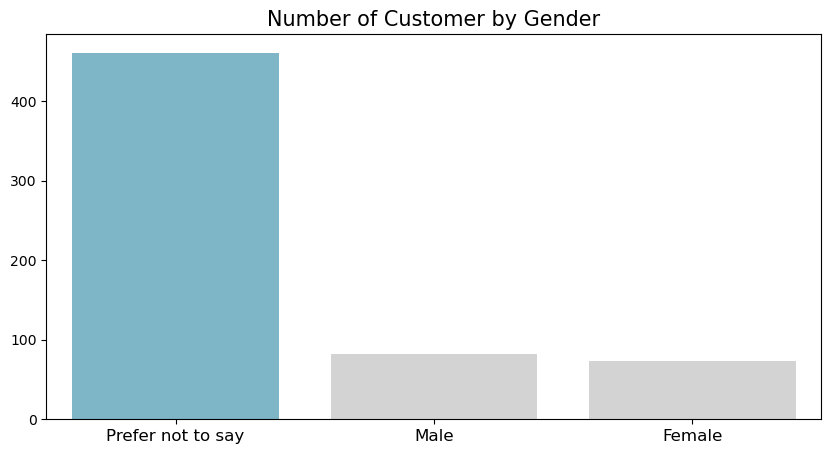

In [65]:
bygender_df = all_df.groupby(by='gender').customer_id.nunique().reset_index()
bygender_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(y='customer_count', x='gender', data=bygender_df.sort_values(by='customer_count', ascending=False), palette=colors)

plt.title("Number of Customer by Gender", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan gambar di atas, diketahui bahwa kebanyakan pelanggan tidak bersedia untuk memberitahukan informasi terkait gender-nya.

### Berdasarkan Age

Untuk melihat demografi pelanggan berdasarkan usia, kita bisa mengelompokkannya sesuai kelompok usia. Selanjutnya, kita bisa memvisualisasikan hasil pengelompokkan tersebut. Anda dapat menggunakan kode di bawah ini untuk melakukannya.

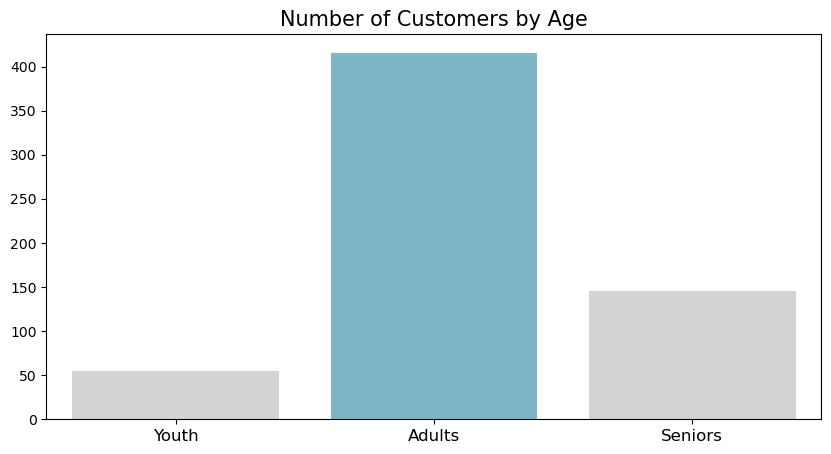

In [66]:
byage_df = all_df.groupby(by="age_group").customer_id.nunique().reset_index()
byage_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

byage_df
byage_df['age_group'] = pd.Categorical(byage_df['age_group'], ['Youth', 'Adults', 'Seniors'])
plt.figure(figsize=(10, 5))
colors = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y='customer_count', x='age_group', data=byage_df.sort_values(by='age_group', ascending=False), palette=colors)

plt.title("Number of Customers by Age", loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Seperti yang bisa Anda lihat, pelanggan yang kita miliki didominasi oleh kelompok usia dewasa.

### Berdasarkan States

Selain berdasarkan gender dan age, kita juga bisa melihat demografi pelanggan berdasarkan states atau negara bagiannya. Berikut contoh kode untuk melakukannya.

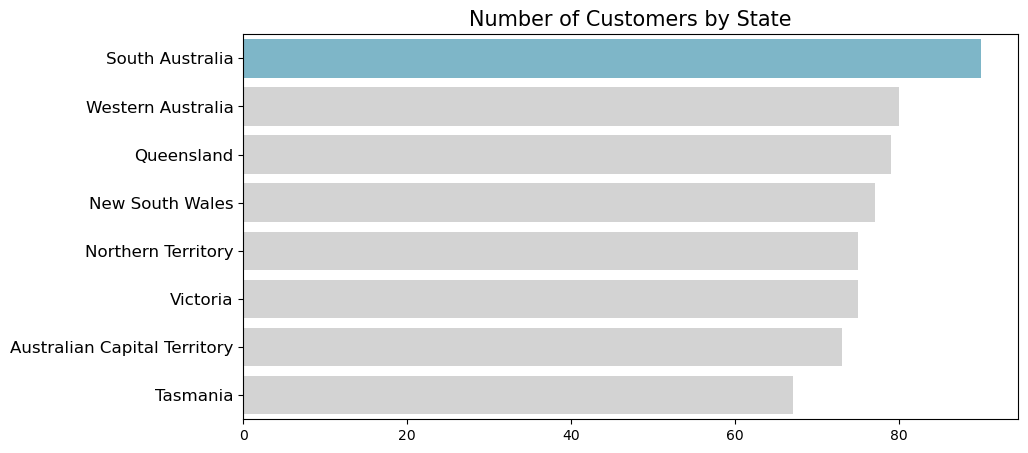

In [67]:
bystate_df = all_df.groupby(by="state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

bystate_df

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x='customer_count', y='state', data=bystate_df.sort_values(by='customer_count', ascending=False), palette=colors_)

plt.title("Number of Customers by State", loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan visualisasi data tersebut, dapat diketahui bahwa pelanggan yang kita miliki paling banyak berasal dari negara bagian South Australia.

## RFM Analysis

Untuk menjawab tiga pertanyaan analisis terakhir, kita bisa menggunakan teknik analisis lanjutan yang bernama RFM analysis. Sederhananya, RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

1. Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
2. Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
3. Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

Nah, berdasarkan tiga parameter tersebut, kita bisa mengidentifikasi pelanggan mana yang memiliki high value (sering melakukan transaksi dan menghasilkan revenue yang besar) dan low value. 

Untuk melakukan RFM analysis, kita perlu membuat sebuah DataFrame untuk menampung informasi terkait tiga parameter tersebut. Berikut contoh kode yang dapat Anda gunakan untuk memperoleh informasi terkait recency, frequency, dan monetary.

In [68]:
rfm_df = all_df.groupby(by='customer_id', as_index=False).agg({
    "order_date": "max", # mengambil tanggal order akhir
    "order_id": "nunique", # mengambil jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = orders_df['order_date'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,3,1641,203
1,7,1,1017,156
2,10,1,270,229
3,11,1,382,149
4,12,1,1551,127


Nah, pada tahap ini Anda dapat mengidentifikasi best customer berdasarkan parameter frequency, monetary, dan recancy menggunakan kode berikut.

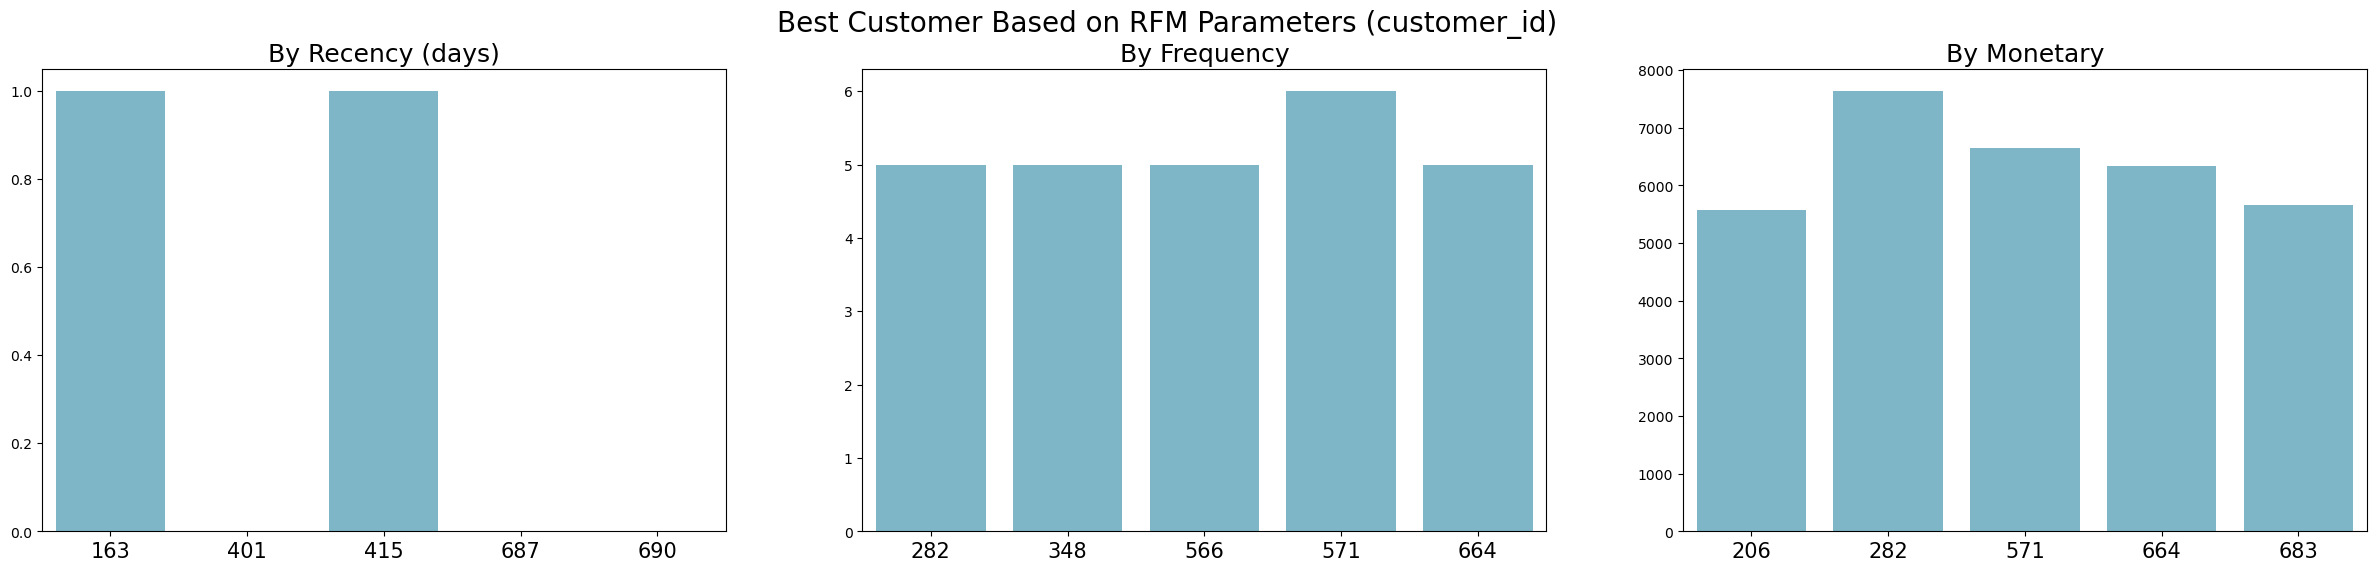

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y='recency', x='customer_id', data=rfm_df.sort_values(by='recency', ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y='frequency', x='customer_id', data=rfm_df.sort_values(by='frequency', ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc='center', fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y='monetary', x='customer_id', data=rfm_df.sort_values(by='monetary', ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc='center', fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

Dari visualisasi data di atas, kita dapat melihat beberapa pelanggan terbaik berdasarkan ketiga parameter tersebut. Informasi ini tentunya dapat membantu kita dalam menjawab tiga pertanyaan analisis terakhir.

In [70]:
all_df.to_csv("all_data.csv", index=False)

In [84]:
pip install streamlit babel

Note: you may need to restart the kernel to use updated packages.


## Menyiapkan DataFrame

Setelah tahap persiapan selesai, kini kita dapat mulai membuat dashboard dengan streamlit. Pada tahap awal tentunya kita perlu membuat sebuah berkas python dengan nama dashboard.py. Bukalah berkas tersebut dan tambahkan perintah berikut untuk mengimpor seluruh library yang dibutuhkan pada proyek ini.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snvvs
import streamlit as stv
from babel.numbers import format_currency
sns.set(style='dark')

Tahap berikutnya adalah menyiapkan DataFrame yang akan digunakan untuk membuat visualisasi data. Untuk melakukan hal ini, kita perlu membuat beberapa helper function seperti berikut. Sebagai catatan, kode di bawah ini merupakan contoh kode yang telah kita gunakan pada materi latihan sebelumnya.

1. create_daily_orders_df() digunakan untuk menyiapkan daily_orders_df.

In [89]:
def create_daily_orders_df(df):
    daily_orders_df = df.resample(rule='D', on='order_date').agg({
        "order_id": "nunique",
        "total_price": "sum"
    })
    
    daily_orders_df = daily_orders_df.reset_index()
    daily_orders_df.rename(columns={
        "order_id": "order_count",
        "total_price": "revenue"
    }, inplace=True)
    
    return daily_orders_df

2. create_sum_order_items_df() bertanggung jawab untuk menyiapkan sum_orders_items_df.

In [90]:
def create_sum_order_items_df(df):
    sum_order_items_df = df.groupby('product_name').quantity_x.sum().sort_values(ascending=False).reset_index()
    return sum_order_items_df

3. create_bygender_df() digunakan untuk menyiapkan bygender_df.

In [91]:
def create_bygender_df(df):
    bygender_df = df.groupby(by="gender").customer_id.nunique().reset_index()
    bygender_df.rename(columns={
        "customer_id": "customer_count"
    }, inplace=True)
    
    return bygender_df

4. create_byage_df() merupakan helper function yang digunakan untuk menyiapkan byage_df.

In [93]:
def create_byage_df(df):
    byage_df = df.groupby(by="age_group").customer_id.nunique().reset_index()
    byage_df.rename(columns={
        "customer_id": "customer_count"
    }, inplace=True)
    byage_df['age_group'] = pd.categorical(byage_df['age_group'], ['Youth', 'Adults', 'Seniors'])
    
    return byage_df

5. create_bystate_df() digunakan untuk menyiapkan bystate_df.

In [94]:
def create_bystate_df(df):
    bystate_df = df.groupby(by="state").customer_id.nunique().reset_index()
    bystate_df.rename(columns={
        "customer_id": "customer_count"
    }, inplace=True)
    
    return bystate_df

6. create_rfm_df() bertanggung jawab untuk menghasilkan rfm_df.

In [95]:
def create_rfm_df(df):
    rfm_df = df.groupby(by='customer_id', as_index=False).agg({
        "order_date": "max", # mengambil tanggal order terakhir
        "order_id": "nunique",
        "total_price": "sum"
    })
    
    rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
    
    rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
    recent_date = df["order_date"].dt.date.max()
    rfm_df['recency'] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
    rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
    
    return rfm_df

Nah, setelah menyiapkan beberapa helper function tersebut, tahap berikutnya ialah load berkas all_data.csv sebagai sebuah DataFrame menggunakan kode berikut.

In [96]:
all_df = pd.read_csv("all_data.csv")

Seperti yang telah kita lihat pada materi Latihan Exploratory Data Analysis, all_df memiliki dua kolom yang bertipe datetime, yaitu order_date dan delivery_date. Kolom order_date inilah yang akan menjadi kunci dalam pembuatan filter nantinya. Nah, untuk mendukung hal ini, kita perlu mengurutkan DataFrame berdasarkan order_date serta memastikan kedua kolom tersebut bertipe datetime.  Berikut kode yang dapat kita gunakan untuk melakukan hal tersebut.

In [97]:
datetime_columns = ["order_date", "delivery_date"]
all_df.sort_values(by="order_date", inplace=True)
all_df.reset_index(inplace=True)

for column in datetime_columns:
    all_df[column] = pd.to_datetime(all_df[column])

## Membuat Komponen Filter

Setelah berhasil menyiapkan DataFrame yang akan digunakan, tahap berikutnya ialah menambahkan filter pada dashboard yang akan dibuat. Pada latihan ini, kita akan menggunakan widget date input sebagai filternya dan akan ditempatkan pada bagian sidebar. Selain itu, untuk alasan estetika, kita juga perlu menambahkan logo perusahaan ke dalam sidebar tersebut. 

Berikut merupakan contoh kode yang dapat Anda gunakan untuk membuat filter dengan widget date input serta menambahkan logo perusahaan pada sidebar.

In [99]:
min_date = all_df["order_date"].min()
max_date = all_df["order_date"].max()

with st.sidebar:
    # Menambahkan logo perusahaan
    st.image("https://github.com/dicodingacademy/assets/raw/main/logo.png")
    
    # Mengambil start_date & end_date dari date_input
    start_date , end_date = st.date_input(label='Rentang Waktu', min_value = min_date, max_value = max_date, value = [min_date, max_date])
    

Kode di atas akan menghasilkan start_date dan end_date yang selanjutnya akan digunakan untuk memfilter DataFrame. Berikut merupakan tampilan sidebar yang akan dihasilkan dari kode tersebut.

Nah, start_date dan end_date di atas akan digunakan untuk memfilter all_df. Data yang telah difilter ini selanjutnya akan disimpan dalam main_df. Proses ini dijalankan menggunakan kode berikut.

In [100]:
main_df = all_df[(all_df['order_date'] >= str(start_date)) &
                (all_df['order_date'] <= str(end_date))]

DataFrame yang telah difilter (main_df) inilah yang digunakan untuk menghasilkan berbagai DataFrame yang dibutuhkan untuk membuat visualisasi data. Proses ini tentunya dilakukan dengan memanggil helper function yang telah kita buat sebelumnya.

In [ ]:
daily_orders_df = create_daily_orders_df(main_df)
sum_order_items_df = create_sum_order_items_df(main_df)
bygender_df = create_bygender_df(main_df)
byage_df = create_byage_df(main_df)
bystate_df = create_bystate_df(main_df)
rfm_df = create_rfm_df(main_df)

## Melengkapi Dashboard dengan Berbagai Visualisasi Data

Oke, setelah membuat filter dan menyiapkan seluruh DataFrame yang dibutuhkan, kini saatnya kita melengkapi dashboard tersebut dengan berbagai visualisasi data. Pada bagian awal, kita perlu menambahkan header pada dashboard tersebut. Berikut merupakan kode untuk melakukannya.

In [102]:
st.header('Dicoding Collection Dashboard :sparkles:')

DeltaGenerator()

Tahap berikutnya adalah menambahkan informasi terkait daily orders pada dashboard yang akan kita buat. Pada proyek ini, kita akan menampilkan tiga informasi terkait daily orders, yaitu jumlah order harian serta total order dan revenue dalam range waktu tertentu. 

Pada contoh proyek ini, kita menampilkan informasi total order dan revenue dalam bentuk metric() yang ditampilkan menggunakan layout columns(). Di lain sisi, informasi tentang jumlah order harian ditampilkan dalam bentuk visualisasi data seperti kode berikut.

In [104]:
st.subheader('Daily Orders')

col1, col2 = st.columns(2)

with col1:
    total_orders = daily_orders_df.order_count.sum()
    st.metric("Total orders", value=total_orders)
    
with col2:
    total_revenue = format_currency(daily_orders_df.revenue.sum(), "AUD", locale='es_CO')
    st.metric("Total revenue", value=total_revenue)

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    daily_orders_df["order_date"],
    daily_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color='#90CAF9'
)

ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)

st.pyplot(fig)

DeltaGenerator()

Selain informasi terkait daily orders, kita juga perlu menyertakan informasi tentang performa penjualan dari setiap produk. Pada proyek ini, kita akan menampilkan 5 produk paling laris dan paling sedikit terjual melalui sebuah visualisasi data. Berikut contoh kode yang dapat Anda gunakan untuk melakukan hal tersebut.

In [105]:
st.header("Best & Worst Performing Product")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Number of Sales", fontsize=30)
ax[0].set_title("Best Performing Product", loc='center', fontsize=50)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Number of Sales", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

st.pyplot(fig)

DeltaGenerator()

Informasi berikutnya yang ingin kita tampilkan pada dashboard tersebut ialah terkait demografi pelanggan yang kita miliki. Pada materi Latihan Membuat Visualisasi Data, kita telah membuat tiga buah visualisasi data untuk menjelaskan hal tersebut. Nah, kita akan memasukkan ketiganya ke dalam dashboard dengan kode seperti berikut.

In [106]:
st.subheader("Customer Demographics")

col1, col2 = st.columns(2)

with col1:
    fig, ax = plt.subplots(figsize=(20, 10))
    
    sns.barplot(
        y = 'customer_count',
        x = 'gender',
        data = bygender_df.sort_values(by="customer_count", ascending=False),
        palette = colors,
        ax=ax
    )

ax.set_title("Number of Customer by Gender", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

with col2:
    fig, ax = plt.subplots(figsize=(20, 10))
    
    colors = ["#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
    
    sns.barplot(
        y="customer_count", 
        x="age_group",
        data=byage_df.sort_values(by="age_group", ascending=False),
        palette=colors,
        ax=ax
    )
    
    ax.set_title("Number of Customer by Age", loc="center", fontsize=50)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.tick_params(axis='x', labelsize=35)
    ax.tick_params(axis='y', labelsize=30)
    st.pyplot(fig)

fig, ax = plt.subplots(figsize=(20, 10))
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x = 'customer_count',
    y = 'state',
    data = bystate_df.sort_values(by='customer_count', ascending=False),
    palette = colors,
    ax = ax
)

ax.set_title("Number of Customer by State", loc="center", fontsize=30)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)
st.pyplot(fig)

DeltaGenerator()

Informasi terakhir yang harus kita tampilkan ialah terkait parameter RFM (Recency, Frequency, & Monetary). Nah, pada proyek ini, kita akan menampilkan nilai average atau rata-rata dari ketiga parameter tersebut menggunakan widget metric(). Selain itu kita juga akan menampilkan hasil visualisasi data dari latihan sebelumnya. Berikut kode untuk melakukan hal tersebut.

In [107]:
st.subheader("Best Customer Based on RFM Parameters")
     
col1, col2, col3 = st.columns(3)
     
with col1:
    avg_recency = round(rfm_df.recency.mean(), 1)
    st.metric("Average Recency (days)", value=avg_recency)
     
with col2:
    avg_frequency = round(rfm_df.frequency.mean(), 2)
    st.metric("Average Frequency", value=avg_frequency)
     
with col3:
    avg_frequency = format_currency(rfm_df.monetary.mean(), "AUD", locale='es_CO') 
    st.metric("Average Monetary", value=avg_frequency)
     
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(35, 15))
colors = ["#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9"]
     
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id", fontsize=30)
ax[0].set_title("By Recency (days)", loc="center", fontsize=50)
ax[0].tick_params(axis='y', labelsize=30)
ax[0].tick_params(axis='x', labelsize=35)
     
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("customer_id", fontsize=30)
ax[1].set_title("By Frequency", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=30)
ax[1].tick_params(axis='x', labelsize=35)
     
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel("customer_id", fontsize=30)
ax[2].set_title("By Monetary", loc="center", fontsize=50)
ax[2].tick_params(axis='y', labelsize=30)
ax[2].tick_params(axis='x', labelsize=35)
     
st.pyplot(fig)
     
st.caption('Copyright (c) Dicoding 2023')

DeltaGenerator()